In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
pd.options.display.max_columns = 999

In [3]:
df = pd.read_csv('../data/pbp-2019.csv')
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2019121200,2019-12-12,3,0,58,BAL,NYJ,0,0,85,NaN,1,NaN,0,"9-J.TUCKER EXTRA POINT IS GOOD, CENTER-46-M.CO...",0,NaN,NaN,2019,0,UNDER CENTER,EXTRA POINT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2019121200,2019-12-12,3,1,4,BAL,NYJ,2,20,67,NaN,1,NaN,0,(1:04) (SHOTGUN) 8-L.JACKSON PASS DEEP LEFT TO...,0,NaN,NaN,2019,33,SHOTGUN,PASS,0,1,0,1,DEEP LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,33,OPP,0,NaN,0,NaN,0
2,2019121200,2019-12-12,3,1,4,BAL,NYJ,2,15,72,NaN,0,NaN,0,"(1:04) (SHOTGUN) PENALTY ON BAL, DELAY OF GAME...",0,NaN,NaN,2019,0,SHOTGUN,NO PLAY,0,0,0,0,NaN,0,0,0,NaN,0,0,0,1,0,0,NaN,28,OPP,1,BAL,1,DELAY OF GAME,5
3,2019120812,2019-12-08,2,3,23,OAK,TEN,2,10,50,NaN,0,NaN,0,"(3:23) (NO HUDDLE, SHOTGUN) 4-D.CARR SCRAMBLES...",0,NaN,NaN,2019,2,NO HUDDLE SHOTGUN,SCRAMBLE,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,50,OPP,0,NaN,0,NaN,0
4,2019120812,2019-12-08,2,3,59,OAK,TEN,1,10,50,NaN,0,NaN,0,(3:59) 30-J.RICHARD LEFT TACKLE TO 50 FOR NO G...,0,NaN,NaN,2019,0,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT TACKLE,50,OPP,0,NaN,0,NaN,0


In [4]:
df = df[(df['PassType'] != 'MIDDLE. PENALTY') &
        (df['PassType'] != 'LEFT TO') &
        (df['PassType'] != 'BACK TO') &
        (df['PassType'] != 'MIDDLE TO') &
        (df['PassType'] != 'YARDS &')
        ]

In [5]:
rp = df[(df['PlayType'] == 'RUSH') | (df['PlayType'] == 'PASS')]

In [6]:
# remove down 0
rp = rp[rp['Down'] != 0]

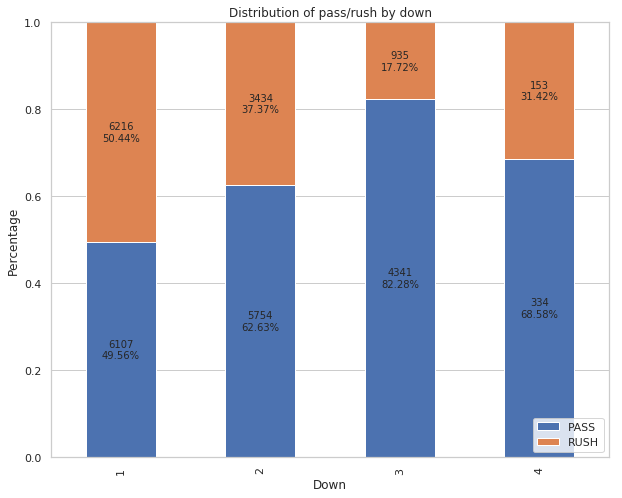

In [7]:
# get the number of pass/rush by down
grouped = rp.groupby(['Down']).agg({'PlayType': 'value_counts'}).unstack()

# turn them into percentages
normed = grouped.div(grouped.sum(axis=1), axis=0)

# reset the columns index
normed.columns = normed.columns.droplevel(0)

# plot
ax = normed.plot(kind='bar',
                 stacked=True,
                 title='Distribution of pass/rush by down',
                 ylim=(0, 1),
                 figsize=(10, 8),
                 )
plt.legend(loc='lower right')
plt.ylabel('Percentage')

group_flattened = grouped.T.values.flatten()
norm_flattened = normed.T.values.flatten() * 100

for i, p in enumerate(ax.patches):
    # place pass/rush counts in the bar itself
    ax.annotate('{}\n{:.2f}%'.format(group_flattened[i], norm_flattened[i]),
                xy=(0.5, 0.5),
                xycoords=p,
                ha='center',
                va='center',
                )